### 뉴럴네트워크
* 인간의 뉴런을 본따 만든 학습 처리기
* 케라스 특징
    - 모듈화 (Modularity)
    - 최소주의 (Minimalism)
    - 쉬운 확장성
    - 파이썬 기반
# 학습 방법
    - 데이터 가져오기/ 전처리
    - 모델 만들기
    - 모델 학습 단계 구성
    - 모델 학습하기
    - 모델 평가하기
    - 모델 튜닝하기
    - 모델 완성

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
# 미 손글씨 숫자 데이터 6만개의 학습셋과 1만개의 테스트셋
# 데이터 가져오기
mnist=keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


X형태: (28, 28) y 형태: 5 x최대값: 255 x최소값: 0 y최대값: 9 y최소값: 0


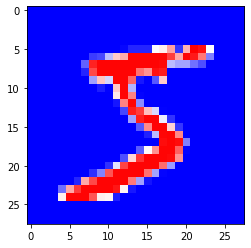

In [16]:
#28*28개의 이미지 데이터
print('X형태:',X_train[0].shape
      ,'y 형태:',y_train[0]
      ,'x최대값:',np.max(X_train[0])
      ,'x최소값:',np.min(X_train[0])
      ,'y최대값:',np.max(y_train)
      ,'y최소값:',np.min(y_train)
     )
plt.imshow(X_train[0],cmap='bwr')
plt.show()

In [17]:
# minmax 처리 float32 정밀도 사용
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
X_train[0].dtype

dtype('float32')

값>>>>>>>>>: 5


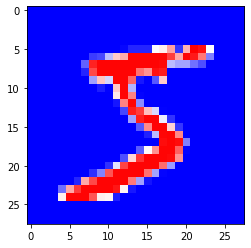

값>>>>>>>>>: 0


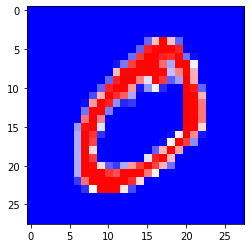

값>>>>>>>>>: 4


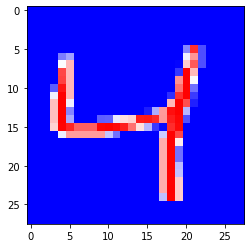

값>>>>>>>>>: 1


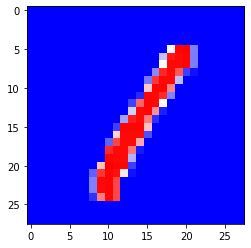

값>>>>>>>>>: 9


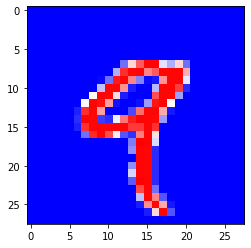

In [18]:
for i,img in enumerate(X_train[:5]):
    print('값>>>>>>>>>:',y_train[i])
    plt.imshow(img,cmap='bwr')
    plt.show()

In [19]:
# 입력데이터:784 출력데이터 1->10개로 변환
Y_train=keras.utils.to_categorical(y_train)
Y_test=keras.utils.to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
# 모델 생성:sequential
model=keras.models.Sequential(
[
keras.layers.Flatten(input_shape=(28,28)), # 입력데이터를 1차원 데이터로 변환
keras.layers.Dense(10,activation='softmax')# 출력데이터는 10개로 구분될것이다 one-hot
]
)

In [21]:
# 모델 학습 과정을 설정: compile
model.compile(optimizer='SGD' # Stochastic gradient descent 확률적 경사 하강법
              ,loss='MSE' # Mean Square Error
              ,metrics=['accuracy'] # 정확도
             )

In [22]:
# 학습하기: fit
hist=model.fit(X_train,Y_train,epochs=100,batch_size=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0906 - accuracy: 0.1025 - val_loss: 0.0892 - val_accuracy: 0.1433
Epoch 2/100
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0880 - accuracy: 0.2037 - val_loss: 0.0864 - val_accuracy: 0.2684
Epoch 3/100
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0851 - accuracy: 0.3191 - val_loss: 0.0832 - val_accuracy: 0.3754
Epoch 4/100
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0819 - accuracy: 0.4015 - val_loss: 0.0798 - val_accuracy: 0.4474
Epoch 5/100
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0786 - accuracy: 0.4577 - val_loss: 0.0763 - val_accuracy: 0.4952
Epoch 6/100
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0753 - accuracy: 0.4979 - val_loss: 0.0729 - val_accuracy: 0.5323
Epoch 7/100
48000/48000 [=========================

In [23]:
tloss,tacc=model.evaluate(X_test,Y_test)
print('손실값:',np.round(tloss,4),'정확도:',np.round(tacc,4))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================